In [ ]:
!pip install scikit-fuzzy
!pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=6a4063bd27f93d5a9b292e11173833481112498b711e2cd3a6dd950a3bdee96c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62120 sha256=56d5d995ba9d36d0e02c25c25f4028a7981ee2b8a7ebcee7a135b90b86107d7f
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


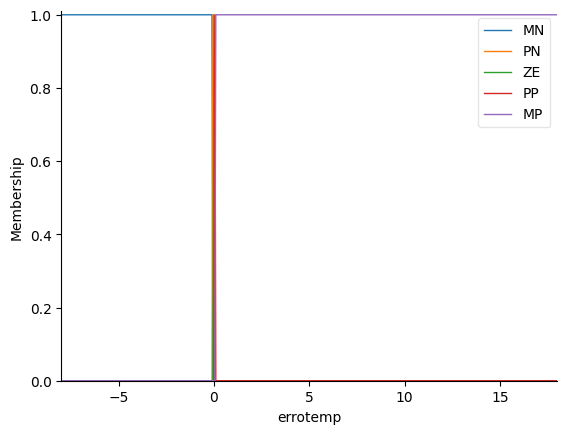

In [ ]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

# Conexão MQTT
mqttBroker ="test.mosquitto.org"
client = mqtt.Client("mosquitto-broker")
client.connect(mqttBroker)

# Antecedente e consequente
errotemp = ctrl.Antecedent(np.arange(-8, 18.05, 0.05), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
resfriador =ctrl.Consequent(np.arange(0, 100, 1), 'resfriador')

# Função de pertinência do erro da temperatura
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -0.1,-0.05])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-0.1,-0.05,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-0.05, 0, 0.05])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 0.05, 0.1])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[0.05, 0.1, 18, 18])
errotemp.view()

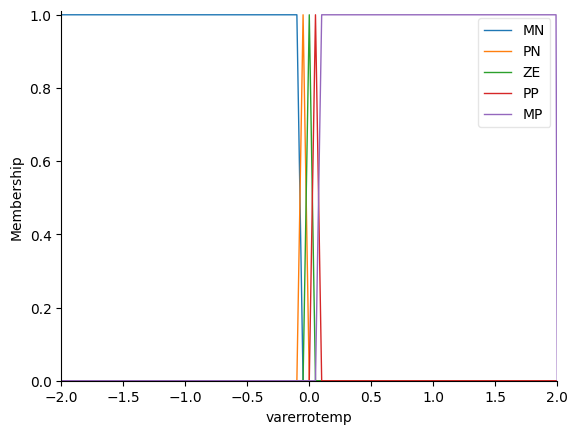

In [ ]:
# Função de pertinência da variação do erro da temperatura
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.1,-0.05])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.1,-0.05,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.05, 0, 0.05])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.05, 0.1])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.05, 0.1, 2,2])
varerrotemp.view()

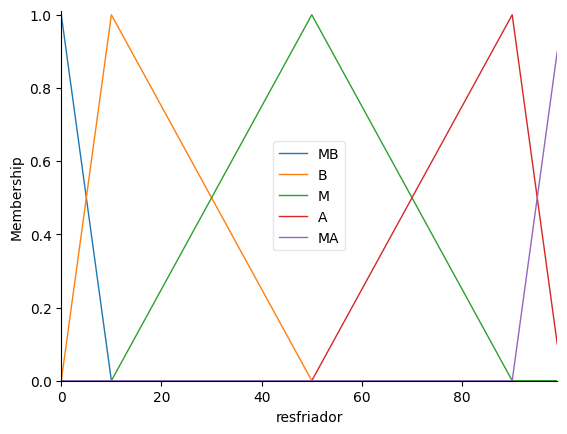

In [ ]:
# Função de pertinência do resfriador
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0,0,10])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0,10,50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [10, 50, 90])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 90, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [90, 100, 100])
resfriador.view()

In [ ]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], resfriador['MB'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], resfriador['MB'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], resfriador['MB'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], resfriador['B'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], resfriador['B'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], resfriador['MB'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], resfriador['B'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], resfriador['B'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], resfriador['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], resfriador['M'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], resfriador['M'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], resfriador['M'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], resfriador['M'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], resfriador['A'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], resfriador['A'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['A'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], resfriador['A'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], resfriador['A'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], resfriador['A'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['A'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['MA'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['MA'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['MA'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], resfriador['MA'])

In [ ]:
resfriador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(resfriador_ctrl)

In [ ]:
def exec_ctrl_fuzzy(sp, temp_inicial, iter):
  tempatual= temp_inicial
  print(tempatual)
  erroatual=0
  t = 0
  while t < iter:
    t += 1
    erroanterior=erroatual
    erroatual=tempatual-sp
    varerroTemp=erroatual-erroanterior
    potencia.input['errotemp'] =erroatual
    potencia.input['varerrotemp'] =varerroTemp
    potencia.compute()
    i=0
    while (i < 10):
      tempatual=tempatual * 0.9952 - potencia.output['resfriador'] * 0.0003963
      i += 1
    time.sleep(0.01)
    print('Temp atual:' + str(tempatual))
    client.publish("Resfriador/Temperatura", tempatual)
    client.publish("Resfriador/Erro", erroatual)

In [ ]:
exec_ctrl_fuzzy(-2, 0, 100)

0
Temp atual:-0.3665169023585979
Temp atual:-0.7216339033004436
Temp atual:-1.060068800091904
Temp atual:-1.3826052572664884
Temp atual:-1.6899901256503016
Temp atual:-1.9829351717360237
Temp atual:-2.1033932494582537
Temp atual:-2.0175117763210255
Temp atual:-2.1656704523105947
Temp atual:-2.076863422859753
Temp atual:-2.136449301316751
Temp atual:-2.0494137166726443
Temp atual:-2.1475748227139473
Temp atual:-2.059634726717509
Temp atual:-2.1466227576396073
Temp atual:-2.0594052781584815
Temp atual:-2.1465933299158566
Temp atual:-2.059358182185443
Temp atual:-2.1466043811931543
Temp atual:-2.059363215243851
Temp atual:-2.146604004140559
Temp atual:-2.059363366800345
Temp atual:-2.146603920402395
Temp atual:-2.0593633092191026
Temp atual:-2.146603929063878
Temp atual:-2.059363311217148
Temp atual:-2.1466039293504378
Temp atual:-2.059363311651894
Temp atual:-2.1466039292497814
Temp atual:-2.059363311606534
Temp atual:-2.146603929253066
Temp atual:-2.0593633116050705
Temp atual:-2.146603

In [ ]:
exec_ctrl_fuzzy(-6, -4, 100)

-4
Temp atual:-4.178611461547361
Temp atual:-4.354650135349584
Temp atual:-4.5224191530016515
Temp atual:-4.682306992849623
Temp atual:-4.834683883940847
Temp atual:-4.979902663309585
Temp atual:-5.1182995929904855
Temp atual:-5.250195138651733
Temp atual:-5.375894711650853
Temp atual:-5.495689376231425
Temp atual:-5.609856523498286
Temp atual:-5.7186605137318125
Temp atual:-5.822353288528626
Temp atual:-5.921174954186157
Temp atual:-5.949753145927127
Temp atual:-5.975353934098568
Temp atual:-5.92086827958795
Temp atual:-5.94948124595197
Temp atual:-5.975108732292125
Temp atual:-5.92109127436806
Temp atual:-5.94967865709279
Temp atual:-5.975286626258357
Temp atual:-5.92092924591506
Temp atual:-5.9495350579438995
Temp atual:-5.975157152575717
Temp atual:-5.921047042539471
Temp atual:-5.949639372806067
Temp atual:-5.975251168933044
Temp atual:-5.9209614368023376
Temp atual:-5.949563520142076
Temp atual:-5.975182784937267
Temp atual:-5.921023666971873
Temp atual:-5.9496186370782365
Temp a

In [ ]:
exec_ctrl_fuzzy(-8, -6, 100)

-6
Temp atual:-6.0846587411417445
Temp atual:-6.170658598114901
Temp atual:-6.252730288214755
Temp atual:-6.330588366375846
Temp atual:-6.40431233914149
Temp atual:-6.4743731480882545
Temp atual:-6.541588784714376
Temp atual:-6.6059490298898185
Temp atual:-6.66754348090443
Temp atual:-6.726443253520996
Temp atual:-6.782713647289496
Temp atual:-6.836412060098718
Temp atual:-6.887596935636154
Temp atual:-6.9363773320234055
Temp atual:-6.982866202939134
Temp atual:-7.027171195909304
Temp atual:-7.069392168313193
Temp atual:-7.109590691846079
Temp atual:-7.147822933938992
Temp atual:-7.184150088967645
Temp atual:-7.218637138239162
Temp atual:-7.251351685825318
Temp atual:-7.282362954300293
Temp atual:-7.311740934292372
Temp atual:-7.3395556752627185
Temp atual:-7.365876702761852
Temp atual:-7.390772546861218
Temp atual:-7.414338413455121
Temp atual:-7.436972317517123
Temp atual:-7.458661373261831
Temp atual:-7.479447823028922
Temp atual:-7.499365152457134
Temp atual:-7.518446618607519
Temp